In [ ]:
# !unzip covid-data.zip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read files

In [2]:
rumours_id = []
non_rumours_id = []
rumours_reply = []
non_rumours_reply = []

with open('/content/drive/MyDrive/nlp-rumour-Detection/covid.rumour.txt' , 'r') as f:
    for line in f:
        rumours_id.append(line.strip())

with open('/content/drive/MyDrive/nlp-rumour-Detection/covid.data.txt' , 'r') as f:
    for line in f:
        line = line.strip() #remove newline
        line = line.split(',')
        source = line[0]
        if source not in rumours_id:
            non_rumours_id.append(source)
            non_rumours_reply.append(line[1:])
        else:
            rumours_id.append(source)
            rumours_reply.append(line[1:])


In [ ]:
import json
import os
import numpy as np
import pandas as pd
import progressbar
r_json = []
nonr_json = []
r_reply_json = []
nonr_reply_json = []


def read_json(id_list):
    print('Reading in progress...')
    # bar = progressbar.ProgressBar(maxval=len(id_list), widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    # bar.start()
    json_obj = []
    hit = 0
    miss = 0
    for i, id in enumerate(id_list):
        filepath = '/content/drive/MyDrive/nlp-rumour-Detection/covid-data/' + id + ".json"
        print('Tweet ID:',id)
        if os.path.exists(filepath): 
            hit += 1
            with open(filepath, 'r', encoding="utf8") as f:
                data = json.load(f)
                json_obj.append(data)
                f.close()
                print('hit' + str(hit))
        else: 
          miss+=1
          print('miss')
    print()
        # bar.update(i+1)
    # bar.finish()
    return json_obj, hit, miss

    
r_json, r_hit, r_miss = read_json(rumours_id)


In [5]:
print('rumours num', len(rumours_id))
print("found:", r_hit)

rumours num 11088
found: 7476


In [ ]:
# reading nonrumours
nonr_json, nr_hit, nr_miss = read_json(non_rumours_id)

In [7]:
print('nonrumours num', len(non_rumours_id))
print('found:' , nr_hit)

nonrumours num 11914
found: 6777


# Collect fields from JSON into dataframe

In [8]:
from pandas.core.internals.managers import T
from datetime import datetime

# rumour tweets
followers = []
following = []
created_at = []
rw_count = []
acc_created = [] 
tweets = []
favourites_count = [] #The number of Tweets this user has liked in the account’s lifetime
statuses_count = [] #The number of Tweets (including retweets) issued by the user.

for t in r_json:
  user = t['user']
  tweets.append(t['text'])
  # reformatting dates
  t1 = datetime.strptime(t['created_at'].replace('+0000 ', ''), '%c')
  t2 = datetime.strptime(user['created_at'].replace('+0000 ', ''), '%c')
  created_at.append(t1)
  acc_created.append(t2)
  
  favourites_count.append(user['favourites_count'])
  following.append(user['friends_count'])
  statuses_count.append(user['statuses_count'])
  followers.append(user['followers_count'])
  rw_count.append(t['retweet_count'])
  
  
print('Rumours df read')
# creat dataframe based on list 
r_df = pd.DataFrame(list(zip(tweets, created_at, acc_created, favourites_count, 
                             following, statuses_count, followers, rw_count)),
                    columns =['tw_text', 'tw_created_at', 'acc_created_at', 'fav_count',
                              'following', 'statuses_count', 'followers', 'retw_count'])



Rumours df read


In [9]:
r_df.head(20)

,tw_text,tw_created_at,acc_created_at,fav_count,following,statuses_count,followers,retw_count
0,President Trump says from the beginning he kne...,2020-03-31 23:20:35,2009-11-14 06:37:11,7829,7910,41903,1269846,5934
1,It was yet another example of right-wingers ig...,2020-04-18 20:29:16,2008-04-24 14:07:28,1140,5582,599917,11360022,198
2,President ⁦@realDonaldTrump⁩ Hits Back at Schu...,2020-04-03 00:01:09,2009-03-25 12:39:59,21054,2159,39010,2229751,1055
3,Florida is part of a coalition of six Republic...,2020-04-22 17:07:29,2009-03-29 20:12:52,286555,65066,331858,966751,427
4,"McConnell about coronavirus: ""It came up while...",2020-03-31 14:48:29,2016-01-24 17:11:07,79370,1288,35145,48175,1771
5,Coronavirus timeline:\n- January 19: 100 cases...,2020-03-14 17:32:36,2015-01-19 09:28:21,7380,2082,14182,309846,8464
6,COVID-19 committed suicide today in Pakistan,2020-05-18 09:24:12,2012-04-19 19:39:19,11364,1675,23706,201538,345
7,"#Coronavirus - Man, dogs sharing spilt milk in...",2020-04-13 14:28:54,2009-05-01 20:34:48,0,14,935617,17054347,1881
8,Having a 10 person limit for gatherings isn’t ...,2020-05-01 19:11:37,2009-05-11 21:42:30,13400,1035,7224,4062508,15498
9,Remember the huge anti-stay-at-home protest in...,2020-05-09 03:05:26,2007-03-09 22:36:12,69156,5363,45595,157614,18372


In [10]:
# nonrumour tweets
nfollowers = []
nfollowing = []
ncreated_at = []
nrw_count = []
nacc_created = [] 
ntweets = []
nfavourites_count = [] #The number of Tweets this user has liked in the account’s lifetime
nstatuses_count = [] #The number of Tweets (including retweets) issued by the user.

for nt in nonr_json:
  nuser = nt['user']
  ntweets.append(nt['text'])
  # reformatting dates
  nt1 = datetime.strptime(nt['created_at'].replace('+0000 ', ''), '%c')
  nt2 = datetime.strptime(nuser['created_at'].replace('+0000 ', ''), '%c')

  ncreated_at.append(nt1)
  nacc_created.append(nt2)
  nfavourites_count.append(nuser['favourites_count'])
  nfollowing.append(nuser['friends_count'])
  nstatuses_count.append(nuser['statuses_count'])
  nfollowers.append(nuser['followers_count'])
  nrw_count.append(nt['retweet_count'])
  
  
print('Non rumours df read')
# creat dataframe based on list 
nr_df = pd.DataFrame(list(zip(ntweets, ncreated_at, nacc_created, nfavourites_count, 
                             nfollowing, nstatuses_count, nfollowers, nrw_count)),
                    columns =['tw_text', 'tw_created_at', 'acc_created_at', 'fav_count',
                              'following', 'statuses_count', 'followers', 'retw_count'])


Non rumours df read


In [11]:
nr_df.head(20)

,tw_text,tw_created_at,acc_created_at,fav_count,following,statuses_count,followers,retw_count
0,Today I’m thinking about the families across o...,2020-04-12 19:39:00,2009-04-11 00:42:07,363,731,16519,19664524,3370
1,Maaaring magdeklara ng martial law si Pangulon...,2020-05-04 10:07:03,2009-05-12 07:14:09,15083,670,774250,6241996,140
2,A doctor treating coronavirus victims and her ...,2020-05-27 19:38:45,2009-11-05 21:33:24,128336,4823,77974,44914,88
3,ICYMI: Select NHS patients will soon be treate...,2020-05-27 06:52:05,2009-01-31 18:44:16,2485,1263,22049,425257,296
4,Immigrants are vital to our company &amp; the ...,2020-04-21 18:08:11,2008-04-24 02:48:26,3745,860,4339,69752,1052
5,2 new cases of #COVID19 have been confirmed in...,2020-03-24 17:25:34,2016-03-04 10:02:09,3362,383,14043,1220855,4596
6,🙂 In a strong testimony to excellent team work...,2020-05-24 05:06:05,2010-04-09 14:49:13,2306,114,30254,1542753,1713
7,"On this #NationalDayofPrayer, let’s remember t...",2020-05-07 16:28:01,2009-02-27 23:04:51,970,59,14469,5878343,862
8,At a NYC hospital:\n• 13 deaths in one day\n• ...,2020-03-25 23:18:22,2010-08-13 19:47:08,4359,1417,12100,85847,1758
9,What’s something you had planned to do and now...,2020-05-13 17:00:24,2013-11-19 03:53:44,16291,3008,66948,4018,1


piechart function with precentage lengend

In [107]:
def piechart(xdict, title):
    labels = list(xdict.keys())
    values = np.array(list(xdict.values()))
    porcent = 100.*values/values.sum() # cheange to percentages

    patches, texts = plt.pie(values, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

    patches, labels, dummy =  zip(*sorted(zip(patches, labels, values), key=lambda x: x[2], reverse=True))
    plt.title(title)
    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
              fontsize=8)

    plt.show()

# Tweets attributes

## favourites count

In [167]:
print('mean values of fav counts')
print('rumour', sum(favourites_count)/len(favourites_count))
print('nonrumour', sum(nfavourites_count)/len(nfavourites_count))

mean values of fav counts
rumour 41198.48140716961
nonrumour 22909.324037184593


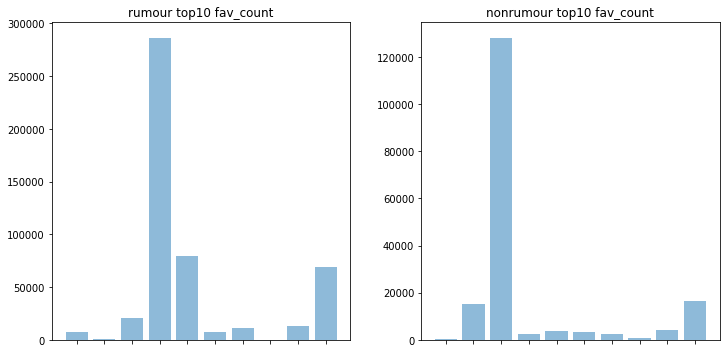

<Figure size 432x288 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt

y_pos = np.arange(0,10)
x = np.arange(10)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(w_pad=4)

plt.subplot(1,2,1)
plt.bar(y_pos, favourites_count[:10], align='center', alpha=0.5)
plt.xticks(x, '')
plt.title('rumour top10 fav_count')

plt.subplot(1,2,2)
plt.bar(y_pos, nfavourites_count[:10], align='center', alpha=0.5)
plt.xticks(x, ' ')
plt.title('nonrumour top10 fav_count')

plt.show()


## Time trend of retweet count

In [168]:
print('mean retweet counts')
print('ruomur', sum(rw_count)/len(rw_count))
print('nonruomur', sum(nrw_count)/len(nrw_count))

mean retweet counts
ruomur 2876.661717495987
nonruomur 2833.297329201712


In [179]:
print('standard deviation of two sets')
print('rumours', statistics.pstdev(rw_count))
print('nonrumours', statistics.pstdev(nrw_count))
print('ratio of miu:',round (statistics.pstdev(rw_count)/ statistics.pstdev(nrw_count),3 ))

standard deviation of two sets
rumours 8296.203785632311
nonrumours 10350.74536290203
ratio of miu: 0.802


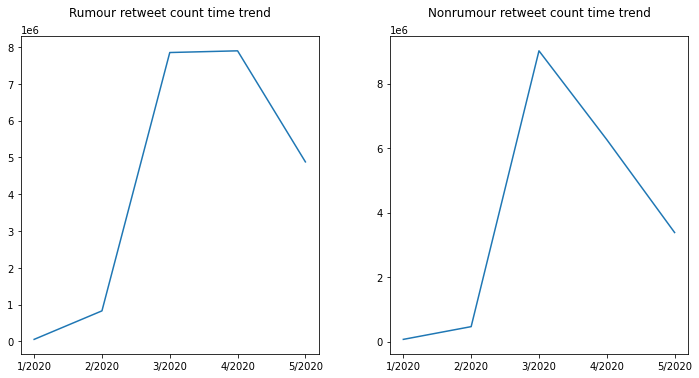

In [45]:
# rumours
ret_dict = {}
for i, time in enumerate(created_at):
  rt_c = rw_count[i]
  key = str(time.month)+'/'+str(time.year)
  ret_dict[key] = ret_dict.get(key, 0) + rt_c

# sort by time
new_dict = dict(sorted(ret_dict.items()))

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(w_pad=4)

#plot line chart
plt.subplot(1,2,1)
x = list(new_dict.keys())
y = [int(v) for v in list(new_dict.values())]
plt.plot(x,y)
plt.title('Rumour retweet count time trend', pad =20)

# nonrumours
nret_dict = {}
for i, time in enumerate(ncreated_at):
  nrt_c = nrw_count[i]
  key = str(time.month)+'/'+str(time.year)
  nret_dict[key] = nret_dict.get(key, 0) + nrt_c

# sort by time
new_dict = dict(sorted(nret_dict.items()))
x = list(new_dict.keys())
y = [int(v) for v in list(new_dict.values())]
#plot line chart
plt.subplot(1,2,2)
plt.plot(x, y)
plt.title('Nonrumour retweet count time trend', pad=20)

plt.show()


## account age
tweet creation - account creation

In [126]:
# sort time
# print('rumours account created at')
# print([str(x) for x in sorted(acc_created)][:10])
# print('nonrumours account created at')
# print([str(x) for x in sorted(nacc_created)][:50])

#only keep year and month to do grouping
acc_age = [(tt-at).days for tt in created_at for at in acc_created]
# print(acc_month[:5])
nacc_age = [(tt-at).days for tt in ncreated_at for at in nacc_created]


KeyboardInterrupt: ignored

In [149]:
keys = ['0-30', '30-183', '183-1825']
def create_age(keys, age):
    acc_dict={}
    for d in age:
      if d>=0 and d<32:
          acc_dict[keys[0]] = acc_dict.get(keys[0], 0) + 1
      elif d>=32 and d<182:
          acc_dict[keys[1]] = acc_dict.get(keys[1], 0) + 1
      elif d>=182 and d<1825:
          acc_dict[keys[2]] = acc_dict.get(keys[2], 0) + 1



    return acc_dict

acc_dict = create_age(keys, acc_age)
nacc_dict = create_age(keys, nacc_age)


In [177]:
print('account age less than half year')

print('rumour', (acc_dict[keys[0]]+acc_dict[keys[1]])/sum(acc_dict.values()))
print('nonrumour', (nacc_dict[keys[0]]+nacc_dict[keys[1]])/sum(nacc_dict.values()))

account age less than half year
rumour 0.05092033602057705
nonrumour 0.09333408673698057


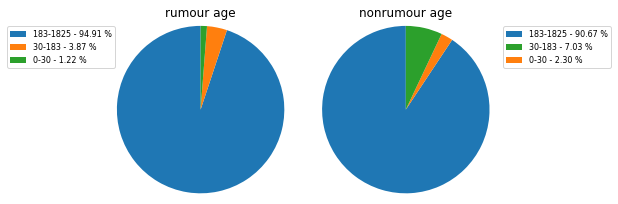

In [150]:
#show piechart
fig, ax = plt.subplots(1, 2, figsize=(6,5))
fig.tight_layout(w_pad=0)

plt.subplot(1,2,1)
labels = list(acc_dict.keys())
values = np.array(list(acc_dict.values()))
porcent = 100.*values/values.sum() # cheange to percentages

patches, texts = plt.pie(values, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

patches, labels, dummy =  zip(*sorted(zip(patches, labels, values), key=lambda x: x[2], reverse=True))
plt.title('rumour age')
plt.legend(patches, labels, loc='upper center', bbox_to_anchor=(-0.3, 1.),
          fontsize=8)


plt.subplot(1,2,2)
labels = list(nacc_dict.keys())
values = np.array(list(nacc_dict.values()))
porcent = 100.*values/values.sum() # cheange to percentages

patches, texts = plt.pie(values, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

patches, labels, dummy =  zip(*sorted(zip(patches, labels, values), key=lambda x: x[2], reverse=True))
plt.title('nonrumour age')
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.7, 1.),
          fontsize=8)

plt.show()

## followings/followers ratio

In [166]:
ratio = []
nratio = []
import statistics

for i, f in enumerate(followers):
  if following[i]==0:
    following[i] = 1
  ratio.append(round(following[i]/f, 2))

for i, nf in enumerate(nfollowers):
  if nf==0:
    nf = 1
  nratio.append(round(nfollowing[i]/nf,2))

print('mean ratio')
print('rumours:' , sum(ratio)/len(ratio))
print('nonrumours:', sum(nratio)/len(nratio))

# print('rumour median', statistics.median(ratio))
# print('nonrumour median', statistics.median(nratio))

mean ratio
rumours: 0.09738095238095043
nonrumours: 0.08850081156853884
rumour median 0.0
nonrumour median 0.0


# Hashtags

In [56]:
# rumours hashtags
tags = {}
for text in tweets:
  tw = text.split()
  for word in tw:
    if "#" in word:
      # lowercase the word
      word = word.lower()
      #remove all symobls exept '#'
      tag = re.sub(r'[^#a-zA-Z]', '',word)
      # found tags, update dict
      tags[tag] = tags.get(tag, 0) + 1

# nonrumours hashtags
ntags = {}
for text in ntweets:
  tw = text.split()
  for word in tw:
    if "#" in word:
      # lowercase the word
      word = word.lower()
      #remove all symobls exept '#'
      tag = re.sub(r'[^#a-zA-Z]', '', word)
      # found tags, update dict
      ntags[tag] = ntags.get(tag, 0) + 1


In [68]:
# get top 20 hastags of two classes
# sort two dict based on their values
tags = dict(sorted(tags.items(), key=lambda item: item[1], reverse=True)[:20])
ntags = dict(sorted(ntags.items(), key=lambda item: item[1], reverse=True)[:20])

r_tags = [re.sub(r'[^#a-zA-Z]', '', s) for s in list(tags.keys())]
nr_tags = [re.sub(r'[^#a-zA-Z]', '', s) for s in list(ntags.keys())]
print('rumour hashtags\n',r_tags)
print('nonrumour hashtags\n',nr_tags)
print()

rumour hashtags
 ['#coronavirus', '#covid', '#china', '#trump', '#breaking', '#lockdown', '#oann', '#trumppressconference', '#coronaviruspandemic', '#', '#stayhome', '#huawei', '#recallkatebrown', '#wuhan', '#fakenews', '#protestlockdown', '#tigerking', '#iran', '#italy', '#alexjones']
nonrumour hashtags
 ['#covid', '#coronavirus', '#breaking', '#stayhome', '#lockdown', '#hydroxychloroquine', '#watch', '#wuhan', '#indiafightscorona', '#coronavirusinsa', '#china', '#coronaviruspandemic', '#', '#stayalert', '#india', '#washyourhands', '#covidinsa', '#staysafe', '#covidnigeria', '#togetherathome']



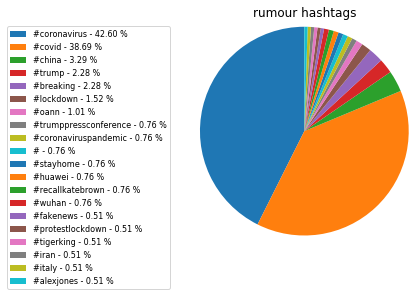

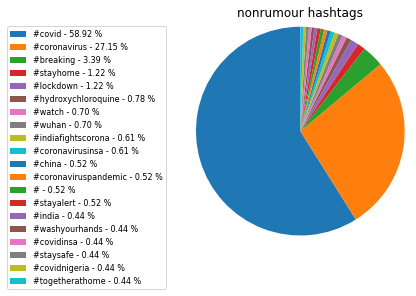

In [109]:
piechart(tags, 'rumour hashtags')
piechart(ntags, 'nonrumour hashtags')

# Word cloud

include unigram and bigram
refer to [tutorial](https://datacamp.com/tutorial/wordcloud-python) here

clean all tweet text

In [49]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = stopwords.words("english")

def preprocess_uni(text):
    # lowercase
    text = text.lower()
    # remove emojis
    text = text.encode('ascii', 'ignore').decode('utf8')
    # remove urls
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'',text)
    # remove html tags
    html = re.compile(r'<.*?>')
    text = html.sub(r'',text)
    # reomve all symbols
    text = re.sub(r'[^\w]', ' ', text)

    # remove stopwords
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])

    tokens = word_tokenize(text)
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # # stemming
    # ps = PorterStemmer()
    # tokens = [ps.stem(word) for word in tokens]

    return text

def preprocess_bi(text):
    # lowercase
    text = text.lower()
    # remove emojis
    text = text.encode('ascii', 'ignore').decode('utf8').strip()
    # remove urls
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'',text)
    # remove html tags
    html = re.compile(r'<.*?>')
    text = html.sub(r'',text).strip()
    # reomve all symbols
    text = re.sub(r'[^\w]', ' ', text)
    # remove stopwords
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])

    # tokenise the sentence
    tokens = word_tokenize(text)
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # # stemming
    # ps = PorterStemmer()
    # tokens = [ps.stem(word) for word in tokens]

    bi_text = ''
    # print(tokens)
    # if len(tokens)==0: return ''
    for i in range(len(tokens)-1):
      w1 = tokens[i]
      w2 = tokens[i+1]
      bi_text += w1+"_"+w2+' '
    # print(bi_text.strip())
    return bi_text.strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


combining all cleaned rumour and nonrumour tweet text together

In [50]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

r_text = []
nr_text = []
r_bitext = []
nr_bitext = []

# process unigram wordcloud text list
for r in r_json:
  r_text.append(preprocess_uni(r['text']))
for nr in nonr_json:
  nr_text.append(preprocess_uni(nr['text']))

# process bigram 
for r in r_json:
  t = preprocess_bi(r['text'])
  r_bitext.append(t)
r_bitext = [x for x in r_bitext if x]
for nr in nonr_json:
  nr_bitext.append(preprocess_bi(nr['text']))
nr_bitext = [x for x in nr_bitext if x]
# post-condition: each tweet is in str format

In [ ]:
print(len(r_bitext))

7452


create wordcloud images

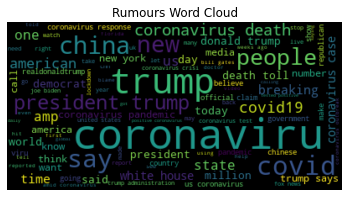

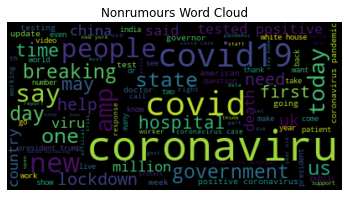

In [52]:
# get unigram wordcloud str
rumour_text = ' '.join(r_text)
nonrumour_text = ' '.join(nr_text)
# Create and generate a word cloud image
r_wc = WordCloud(max_font_size=50, max_words=100).generate(rumour_text)
nr_wc =  WordCloud(max_font_size=50, max_words=100).generate(nonrumour_text)

plt.imshow(r_wc, interpolation='bilinear')
plt.title('rumours Word Cloud')
plt.axis("off")
plt.show()

plt.imshow(nr_wc, interpolation='bilinear')
plt.title('nonrumours Word Cloud')
plt.axis("off")
plt.show()

create bigram wordcloud

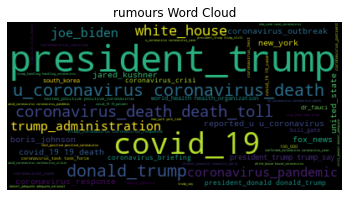

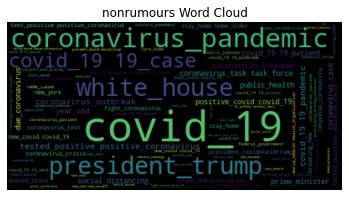

In [72]:
rumour_bitext = ' '.join(r_bitext)
nonrumour_bitext = ' '.join(nr_bitext)

bi_r_wc = WordCloud(max_font_size=50, max_words=200).generate(rumour_bitext)
plt.imshow(bi_r_wc, interpolation='bilinear')
plt.title('rumours Word Cloud')
plt.axis("off")
plt.show()

bi_nr_wc = WordCloud(max_font_size=50, max_words=200).generate(nonrumour_bitext)
plt.imshow(bi_nr_wc, interpolation='bilinear')
plt.title('nonrumours Word Cloud')
plt.axis("off")
plt.show()


# emojis

[doc](https://advertools.readthedocs.io/en/master/advertools.emoji.html#advertools.emoji.extract_emoji)

In [ ]:
!pip install advertools

In [ ]:
import advertools as adv
remoji_summary = adv.extract_emoji(tweets)
nremoji_summary = adv.extract_emoji(ntweets)
print('rumours emoji summary')
print(remoji_summary['overview'])
print(remoji_summary['top_emoji'])
print('nonrumour emoji summary')
print(nremoji_summary['overview'])
print(nremoji_summary['top_emoji'])

rumours emoji summary
{'num_posts': 7478, 'num_emoji': 466, 'emoji_per_post': 0.062316127306766514, 'unique_emoji': 83}
[('🚨', 62), ('😂', 52), ('🇺🇸', 26), ('🤣', 16), ('🇮🇹', 14), ('⚠️', 14), ('‼️', 14), ('▶️', 12), ('🤔', 12), ('👏', 10), ('🔥', 10), ('🦠', 10), ('🌎', 8), ('🇪🇸', 8), ('👇', 6), ('🇨🇳', 6), ('🧬', 6), ('❤️', 6), ('🌐', 6), ('📌', 6), ('✔', 4), ('⬇️', 4), ('➖', 4), ('🇿🇦', 4), ('🇫🇷', 4), ('⁉️', 4), ('💥', 4), ('🤦\u200d♂️', 4), ('📺', 4), ('👏🏽', 4), ('💔', 4), ('💀', 4), ('🇩🇪', 4), ('👉', 4), ('▪️', 4), ('🇬🇧', 4), ('🔹', 4), ('☠️', 4), ('🏥', 2), ('😤', 2), ('🇻🇳', 2), ('🇹🇼', 2), ('🇳🇿', 2), ('☕', 2), ('❌', 2), ('✔️', 2), ('😒', 2), ('✏️', 2), ('🇬🇭', 2), ('🇪🇬', 2), ('👀', 2), ('🌹', 2), ('🧡', 2), ('✨', 2), ('🤢', 2), ('🗑', 2), ('😑', 2), ('👇🏼', 2), ('😭', 2), ('🤦', 2), ('🍦', 2), ('☹️', 2), ('💰', 2), ('😡', 2), ('✋', 2), ('🤦🏻\u200d♂️', 2), ('🙋', 2), ('🎨', 2), ('🤯', 2), ('👍', 2), ('🎥', 2), ('💪', 2), ('😟', 2), ('🇯🇵', 2), ('😬', 2), ('⚡', 2), ('✈️', 2), ('☑️', 2), ('😉', 2), ('👏🏼', 2), ('🇮🇷', 2), ('🇰🇷', 2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127481 missing from current font.
  fon

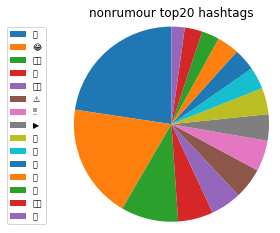

In [ ]:
re = []
rv = []
for i, (e, n) in enumerate(remoji_summary['top_emoji']):
  if i == 15:
    break
  else:
    re.append(e)
    rv.append(n)

# porcent = 100.*rv/rv.sum() # cheange to percentages

patches, texts = plt.pie(rv, startangle=90, radius=1.2)

patches, l, dummy =  zip(*sorted(zip(patches, re, rv), key=lambda x: x[2], reverse=True))
plt.title('nonrumour top20 hashtags')
plt.legend(patches,l, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.show()